<a href="https://colab.research.google.com/github/celestebgriff/Murder/blob/master/Murders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('database.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [0]:
df = df.replace('Unknown', np.nan)

In [5]:
df.isnull().sum()

Record ID                     0
Agency Code                   0
Agency Name                  47
Agency Type                   0
City                          0
State                         0
Year                          0
Month                         0
Incident                      0
Crime Type                    0
Crime Solved                  0
Victim Sex                  984
Victim Age                    0
Victim Race                6676
Victim Ethnicity         368303
Perpetrator Sex          190365
Perpetrator Age               0
Perpetrator Race         196047
Perpetrator Ethnicity    446410
Relationship             273013
Weapon                    33192
Victim Count                  0
Perpetrator Count             0
Record Source                 0
dtype: int64

In [0]:
df = df.dropna(subset=['Weapon'])

In [7]:
df['Weapon'].describe()

count      605262
unique         15
top       Handgun
freq       317484
Name: Weapon, dtype: object

In [8]:
df['Weapon'].value_counts(normalize=True)

Handgun          0.524540
Knife            0.156894
Blunt Object     0.111253
Firearm          0.077619
Shotgun          0.050758
Rifle            0.038573
Strangulation    0.013399
Fire             0.010199
Suffocation      0.006556
Gun              0.003645
Drugs            0.002624
Drowning         0.001989
Explosives       0.000887
Poison           0.000750
Fall             0.000314
Name: Weapon, dtype: float64

In [9]:
df.isnull().sum()

Record ID                     0
Agency Code                   0
Agency Name                  43
Agency Type                   0
City                          0
State                         0
Year                          0
Month                         0
Incident                      0
Crime Type                    0
Crime Solved                  0
Victim Sex                  520
Victim Age                    0
Victim Race                5472
Victim Ethnicity         344615
Perpetrator Sex          175578
Perpetrator Age               0
Perpetrator Race         180957
Perpetrator Ethnicity    418509
Relationship             253021
Weapon                        0
Victim Count                  0
Perpetrator Count             0
Record Source                 0
dtype: int64

In [0]:
df['Victim Age'] = df['Victim Age'].replace(0, np.nan)

In [0]:
df['Perpetrator Age'] = df['Perpetrator Age'].replace(0, np.nan)

In [12]:
df

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14.0,Native American/Alaska Native,NaN,Male,15,Native American/Alaska Native,NaN,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43.0,White,NaN,Male,42,White,NaN,Acquaintance,Strangulation,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43.0,White,NaN,Male,42,White,NaN,Acquaintance,Strangulation,0,0,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,Yes,Male,30.0,White,NaN,Male,36,White,NaN,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,Yes,Female,42.0,Native American/Alaska Native,NaN,Male,27,Black,NaN,Wife,Knife,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30.0,White,Hispanic,NaN,0,NaN,NaN,NaN,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62.0,White,NaN,Male,57,White,NaN,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,NaN,Asian/Pacific Islander,NaN,Female,22,Asian/Pacific Islander,NaN,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55.0,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [0]:
df = df.drop(columns=['Record ID', 'Agency Code', 'Agency Name', 'City',
                      'Record Source', 'Crime Type', 'Incident'])

In [14]:
df['Weapon'].unique()

array(['Blunt Object', 'Strangulation', 'Rifle', 'Knife', 'Firearm',
       'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

In [0]:
df.loc[df['Weapon'] == 'Rifle', 'Weapon'] = 'Gun'
df.loc[df['Weapon'] == 'Firearm', 'Weapon'] = 'Gun'
df.loc[df['Weapon'] == 'Shotgun', 'Weapon'] = 'Gun'
df.loc[df['Weapon'] == 'Handgun', 'Weapon'] = 'Gun'
df.loc[df['Weapon'] == 'Blunt Object', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Strangulation', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Knife', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Fall', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Drowning', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Suffocation', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Explosives', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Fire', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Drugs', 'Weapon'] = 'Other'
df.loc[df['Weapon'] == 'Poison', 'Weapon'] = 'Other'

In [16]:
df['Weapon'].unique()

array(['Other', 'Gun'], dtype=object)

In [17]:
df['Weapon'].value_counts(normalize=True)

Gun      0.695135
Other    0.304865
Name: Weapon, dtype: float64

In [0]:
import matplotlib.pyplot as plt

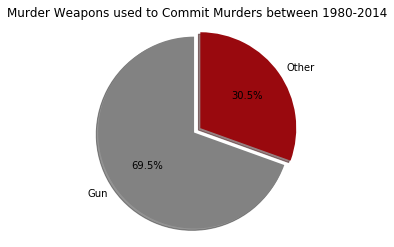

In [19]:
labels = 'Gun', 'Other'
sizes = [69.5,30.5]
colors = ['#828282','#99090E']
explode = (0, 0.08)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=colors,
      explode=explode, shadow=True) 
ax.axis('equal')
ax.set_title('Murder Weapons used to Commit Murders between 1980-2014')
plt.show()

In [0]:
target = 'Weapon'

In [0]:
train_features = df.drop(columns=[target])

In [0]:
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

In [0]:
cardinality = train_features.select_dtypes(exclude='number').nunique()

In [0]:
categorical_features = cardinality[cardinality <= 55].index.tolist()

In [0]:
features = numeric_features + categorical_features

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=42)

train.shape, test.shape

((453946, 17), (151316, 17))

In [27]:
train, val = train_test_split(train, random_state=42)

train.shape, val.shape, test.shape

((340459, 17), (113487, 17), (151316, 17))

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [29]:
X_train.head()

,Year,Victim Age,Victim Count,Perpetrator Count,Agency Type,State,Month,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Relationship
482220,2005,22.0,0,0,Municipal Police,Alabama,June,No,Male,Black,NaN,NaN,NaN,NaN,NaN
449110,2002,47.0,2,0,Sheriff,West Virginia,September,Yes,Female,White,NaN,Male,White,NaN,Girlfriend
87015,1984,23.0,0,0,Municipal Police,California,September,Yes,Male,White,Not Hispanic,Male,White,Not Hispanic,NaN
210118,1990,47.0,0,0,Municipal Police,North Carolina,July,Yes,Male,Black,Not Hispanic,Female,Black,Not Hispanic,Husband
30418,1981,19.0,0,0,Municipal Police,Illinois,May,Yes,Male,Black,Not Hispanic,Male,Black,Not Hispanic,Friend


Baselines:

In [0]:
majority = y_train.mode()[0]
y_pred = [majority] * len(y_train)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.6951439086644794

Linear Model:

In [32]:
pip install --upgrade category_encoders

     |████████████████████████████████| 102kB 6.3MB/s 


In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [34]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

model = LogisticRegressionCV()
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.7263915690783966


Tree Based Model:

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [36]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.7412567078167543


xgboost:

In [37]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Agency Type', 'State', 'Month',
                                      'Crime Solved', 'Victim Sex',
                                      'Victim Race', 'Victim Ethnicity',
                                      'Perpetrator Sex', 'Perpetrator Race',
                                      'Perpetrator Ethnicity', 'Relationship'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Agency Type',
                                          'data_type': dtype('O'),
                                          'map...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_st

In [38]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.748209045970023


In [39]:
y_pred = pipeline.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

Test Accuracy 0.7484469586824922


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [41]:
 !pip install pdpbox

     |████████████████████████████████| 57.7MB 66kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690722 sha256=bb34ec7720ba5a812fd35390cd4b2d841b97ecb7e2304015842e8a15d68de8a2
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Year'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


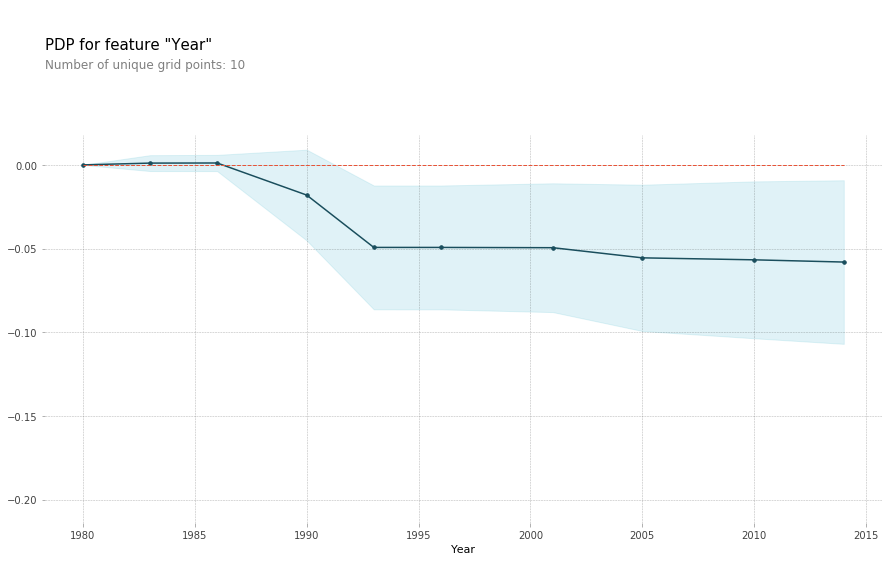

In [43]:
pdp_plot(isolated, feature_name=feature);

In [0]:
feature = 'Perpetrator Count'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

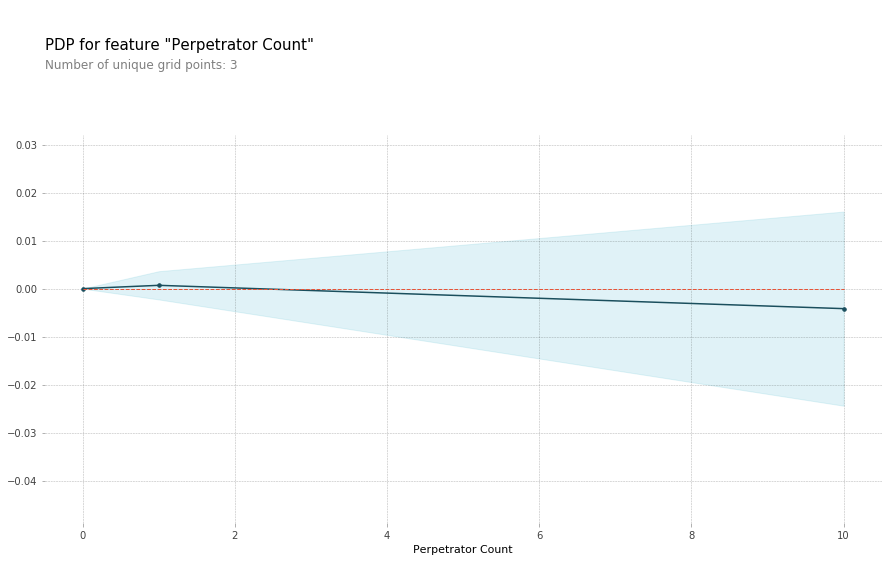

In [45]:
pdp_plot(isolated, feature_name=feature);

In [0]:
feature = 'Victim Count'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

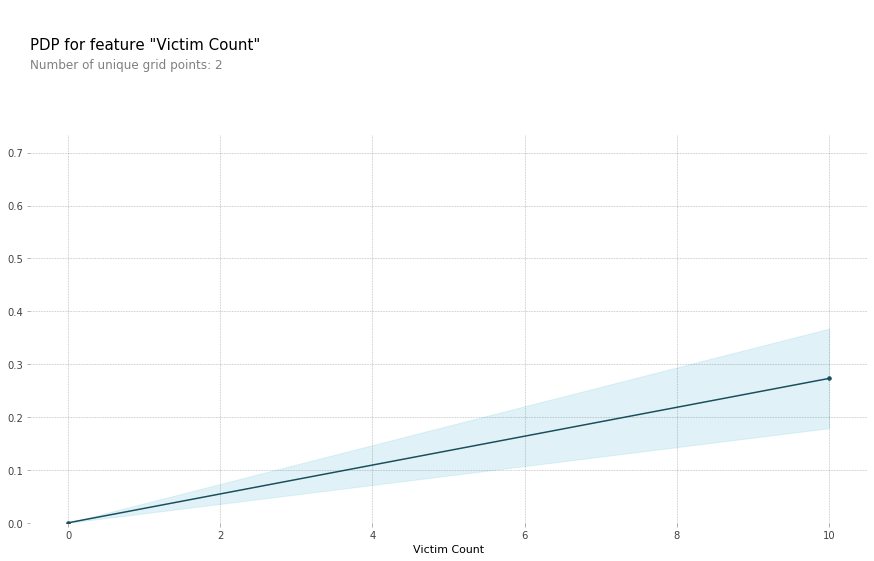

In [47]:
pdp_plot(isolated, feature_name=feature);

In [0]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [0]:
features = ['Victim Count', 'Perpetrator Count']

interaction = pdp_interact(
    model=pipeline, 
    dataset=X_val,
    model_features=X_val.columns, 
    features=features
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


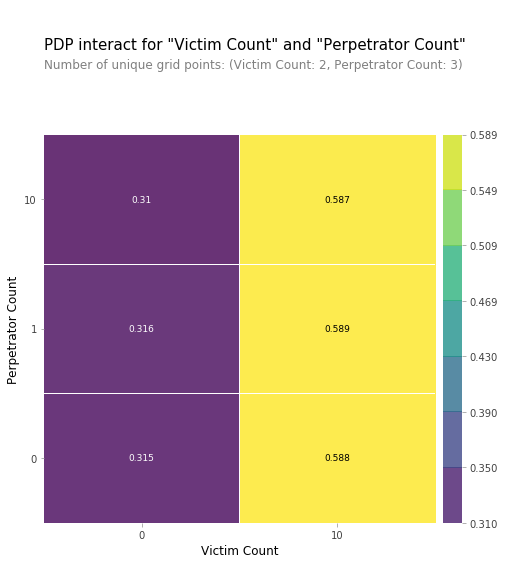

In [50]:
pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

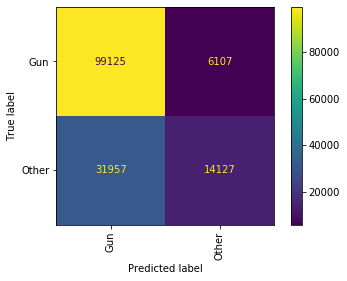

In [51]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipeline, X_test, y_test, values_format='.0f', xticks_rotation='vertical');

In [60]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Agency Type', 'State', 'Month',
                                      'Crime Solved', 'Victim Sex',
                                      'Victim Race', 'Victim Ethnicity',
                                      'Perpetrator Sex', 'Perpetrator Race',
                                      'Perpetrator Ethnicity', 'Relationship'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Agency Type',
                                          'data_type': dtype('O'),
                                          'map...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_st

In [61]:
from joblib import dump
dump(pipeline, 'pipeline.joblib', compress=True)

['pipeline.joblib']

In [0]:
from google.colab import files
files.download('pipeline.joblib')

In [63]:
import joblib
import sklearn
import category_encoders as ce
import xgboost
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'xgboost=={xgboost.__version__}')

joblib==0.14.1
scikit-learn==0.22.1
category_encoders==2.1.0
xgboost==0.90
